# Target Encoding
## It's a method of encoding categories as numbers, like one-hot or label encoding, with the difference that it also uses the target to create the encoding.

In [2]:
import pandas as pd

autos = pd.read_csv("../../data/feature_engineering/Automobile_data.csv")

## A simple and effective version is to apply a group aggregation from Lesson 3, like the mean. 

In [4]:
autos["make_encoded"] = autos.groupby("make")["price"].transform("mean")

autos[["make", "price", "make_encoded"]].head(10)

# This kind of target encoding is sometimes called a mean encoding.

,make,price,make_encoded
0,alfa-romero,13495,15498.333333
1,alfa-romero,16500,15498.333333
2,alfa-romero,16500,15498.333333
3,audi,13950,17859.166667
4,audi,17450,17859.166667
5,audi,15250,17859.166667
6,audi,17710,17859.166667
7,audi,18920,17859.166667
8,audi,23875,17859.166667
9,bmw,16430,26118.750000


# Smoothing

## The idea is to blend the in-category average with the overall average

### Rare categories get less weight on their category average, while missing categories just get the overall average.

```python
encoding = weight * in_category + (1 - weight) * overall
```

### where weight is a value between 0 and 1 calculated from the category frequency.

```python
weight = n / (n + m)
```

## where n is the total number of times that category occurs in the data. The parameter m determines the "smoothing factor". Larger values of m put more weight on the overall estimate.

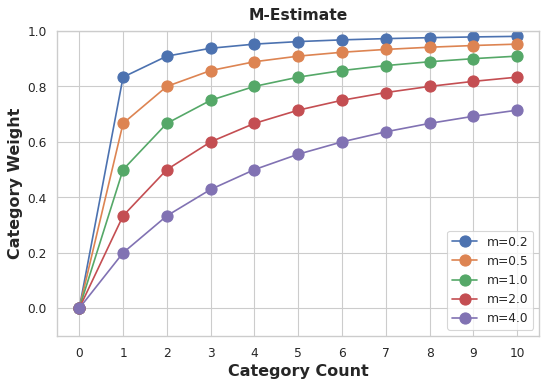